# Exercício 02 - Resolução espacial e resolução radiométrica

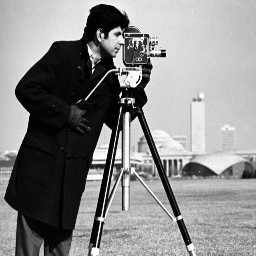

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('../data/cameraman.tif')
img

1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides **10 e 11** (Aula2.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização **(slide 19)**.
3. **Explorando diferentes espaços de cores:** Abra uma imagem colorida (use as imagens existentes no diretório *data*) e visualize as 3 bandas RGB. Converta para uma imagem em níveis de cinza usando vários métodos e encontre uma forma (quantitativa) de comparar as diversas imagens em níveis de cinza obtidas:
    - convert(L) do PIL;
    - médias das bandas R, G, B;
    - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
4. **Retomando a geração de imagens sintéticas:** Faça um programa qualquer de geração de imagem a partir de uma equação. Utilize a função *indices* do Numpy

# Respostas

## Parte 1: Entendendo a resolução espacial

### Observação: Assume-se que este notebook está localizado dentro do diretório ia898/2S2018 . Sendo assim, todos os acessos a outros arquivos terão esta localização como referência. 

Chegagem do diretório com **pwd**

In [3]:
pwd

'/home/marcio/progs/ia898/2S2018'

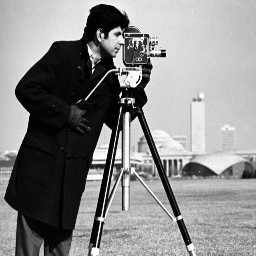

In [4]:
import numpy as np
from PIL import Image
img0 = Image.open('../data/cameraman.tif')


img0

Interessante notar que a imagem não aparece quando há outros comandos antes de fazer a chamada da imagem:

In [5]:
img0
print("Quando colocamos outros comandos antes de img, a imagem não aparece")

Quando colocamos outros comandos antes de img, a imagem não aparece


Para que a exibição da imagem aconteça depois de colocar outros comandos, podemos usar **display(img0)** :

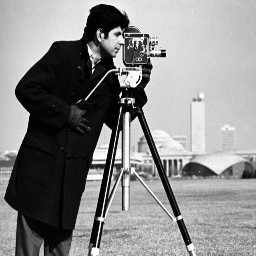

Testando o uso de display(img)


In [6]:
display(img0)

print("Testando o uso de display(img)")


Vamos criar a função **show_image**, que recebe três argumentos: largura(L) e comprimento(C) da imagem, e uma string que leva até o caminho onde a imagem está localizada.

O redimensionamento da imagem será realizado através da propriedade **resize**, que recebe uma tupla contendo as dimensões para as quais se deseja remodelar a imagem. No final utilizamos **display** para exibir a imagem com novas dimensões:

In [7]:
def show_image(L,C,datapath):
    #exibe uma imagem localizada em um determinado local, com dimensões L x C.
    
    #abertura do arquivo
    pic = Image.open(datapath)
    
    print("Tamanho original da imagem: ",pic.size)
    
    #a tupla L,C será armazenada em resize_to
    resize_to = (L,C)
    
    #criação da imagem redimensionada
    new_pic = pic.resize(resize_to)
    
    print("Imagem: ", datapath , "\n")
    print("Resolução escolhida: ", str(L)+ " x " + str(C))

    #exibição da imagem
    display(new_pic)
    
    print("Tamanho da imagem redimensionada: ",new_pic.size , "\n\n")
    

Agora, faremos a exibição da imagem em diferentes dimensões:

Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  32 x 32


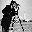

Tamanho da imagem redimensionada:  (32, 32) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  64 x 64


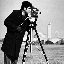

Tamanho da imagem redimensionada:  (64, 64) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  128 x 128


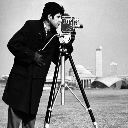

Tamanho da imagem redimensionada:  (128, 128) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  256 x 256


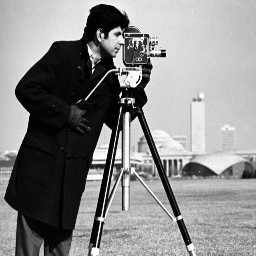

Tamanho da imagem redimensionada:  (256, 256) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  512 x 512


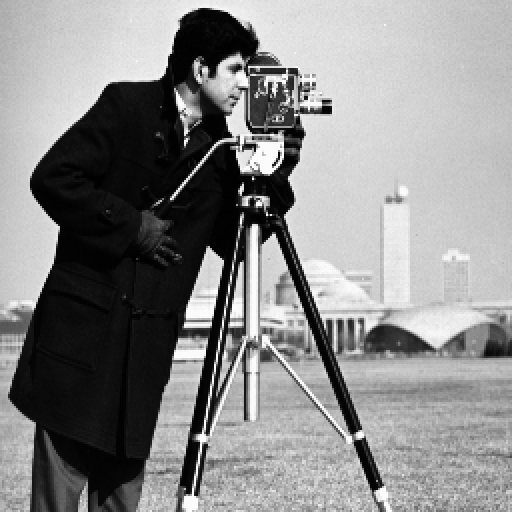

Tamanho da imagem redimensionada:  (512, 512) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  1024 x 1024


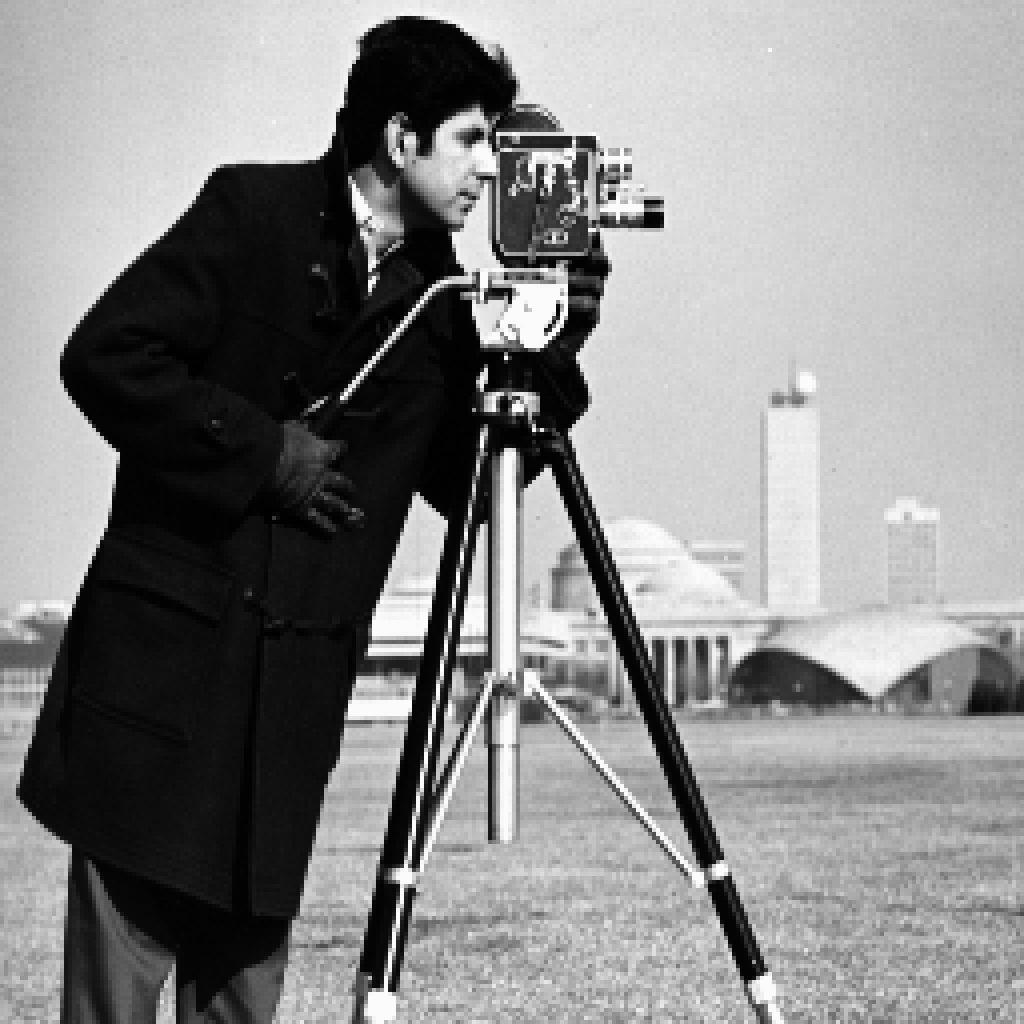

Tamanho da imagem redimensionada:  (1024, 1024) 


Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  2048 x 2048


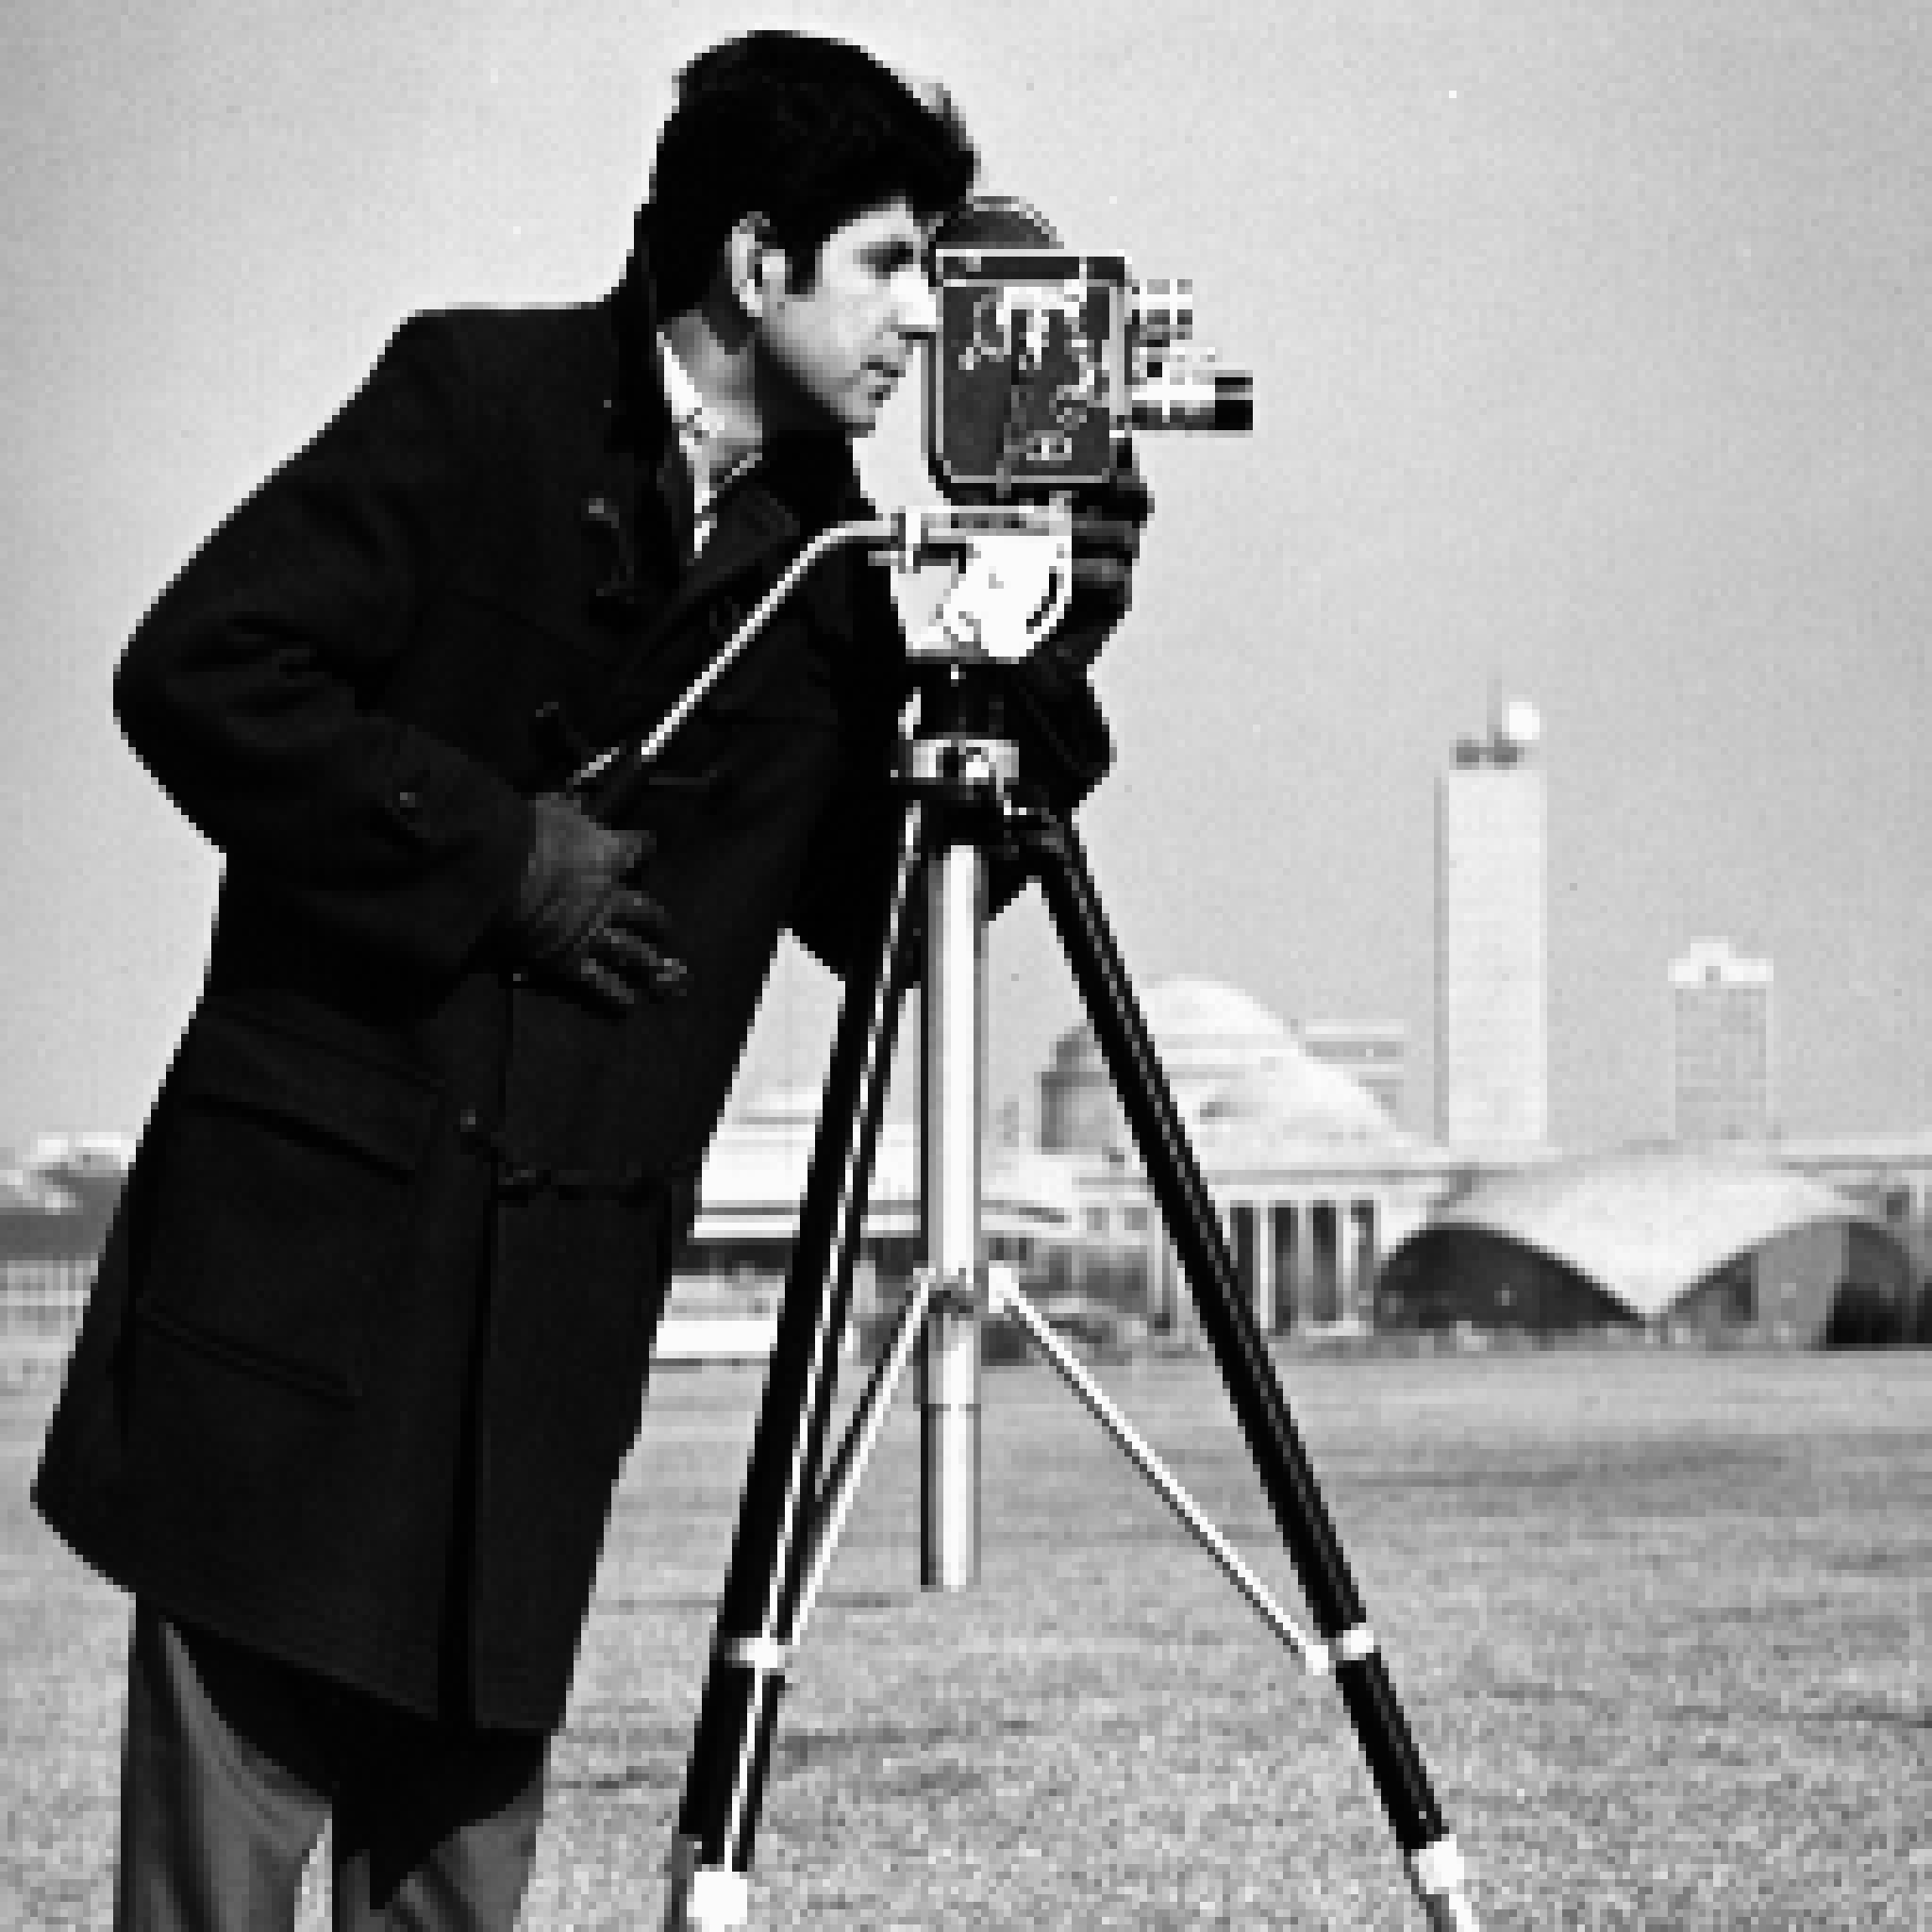

Tamanho da imagem redimensionada:  (2048, 2048) 




In [8]:
show_image(32,32,'../data/cameraman.tif')    
show_image(64,64,'../data/cameraman.tif')
show_image(128,128,'../data/cameraman.tif')    
show_image(256,256,'../data/cameraman.tif')    
show_image(512,512,'../data/cameraman.tif')    
show_image(1024,1024,'../data/cameraman.tif')
show_image(2048,2048,'../data/cameraman.tif')

Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  2048 x 2048


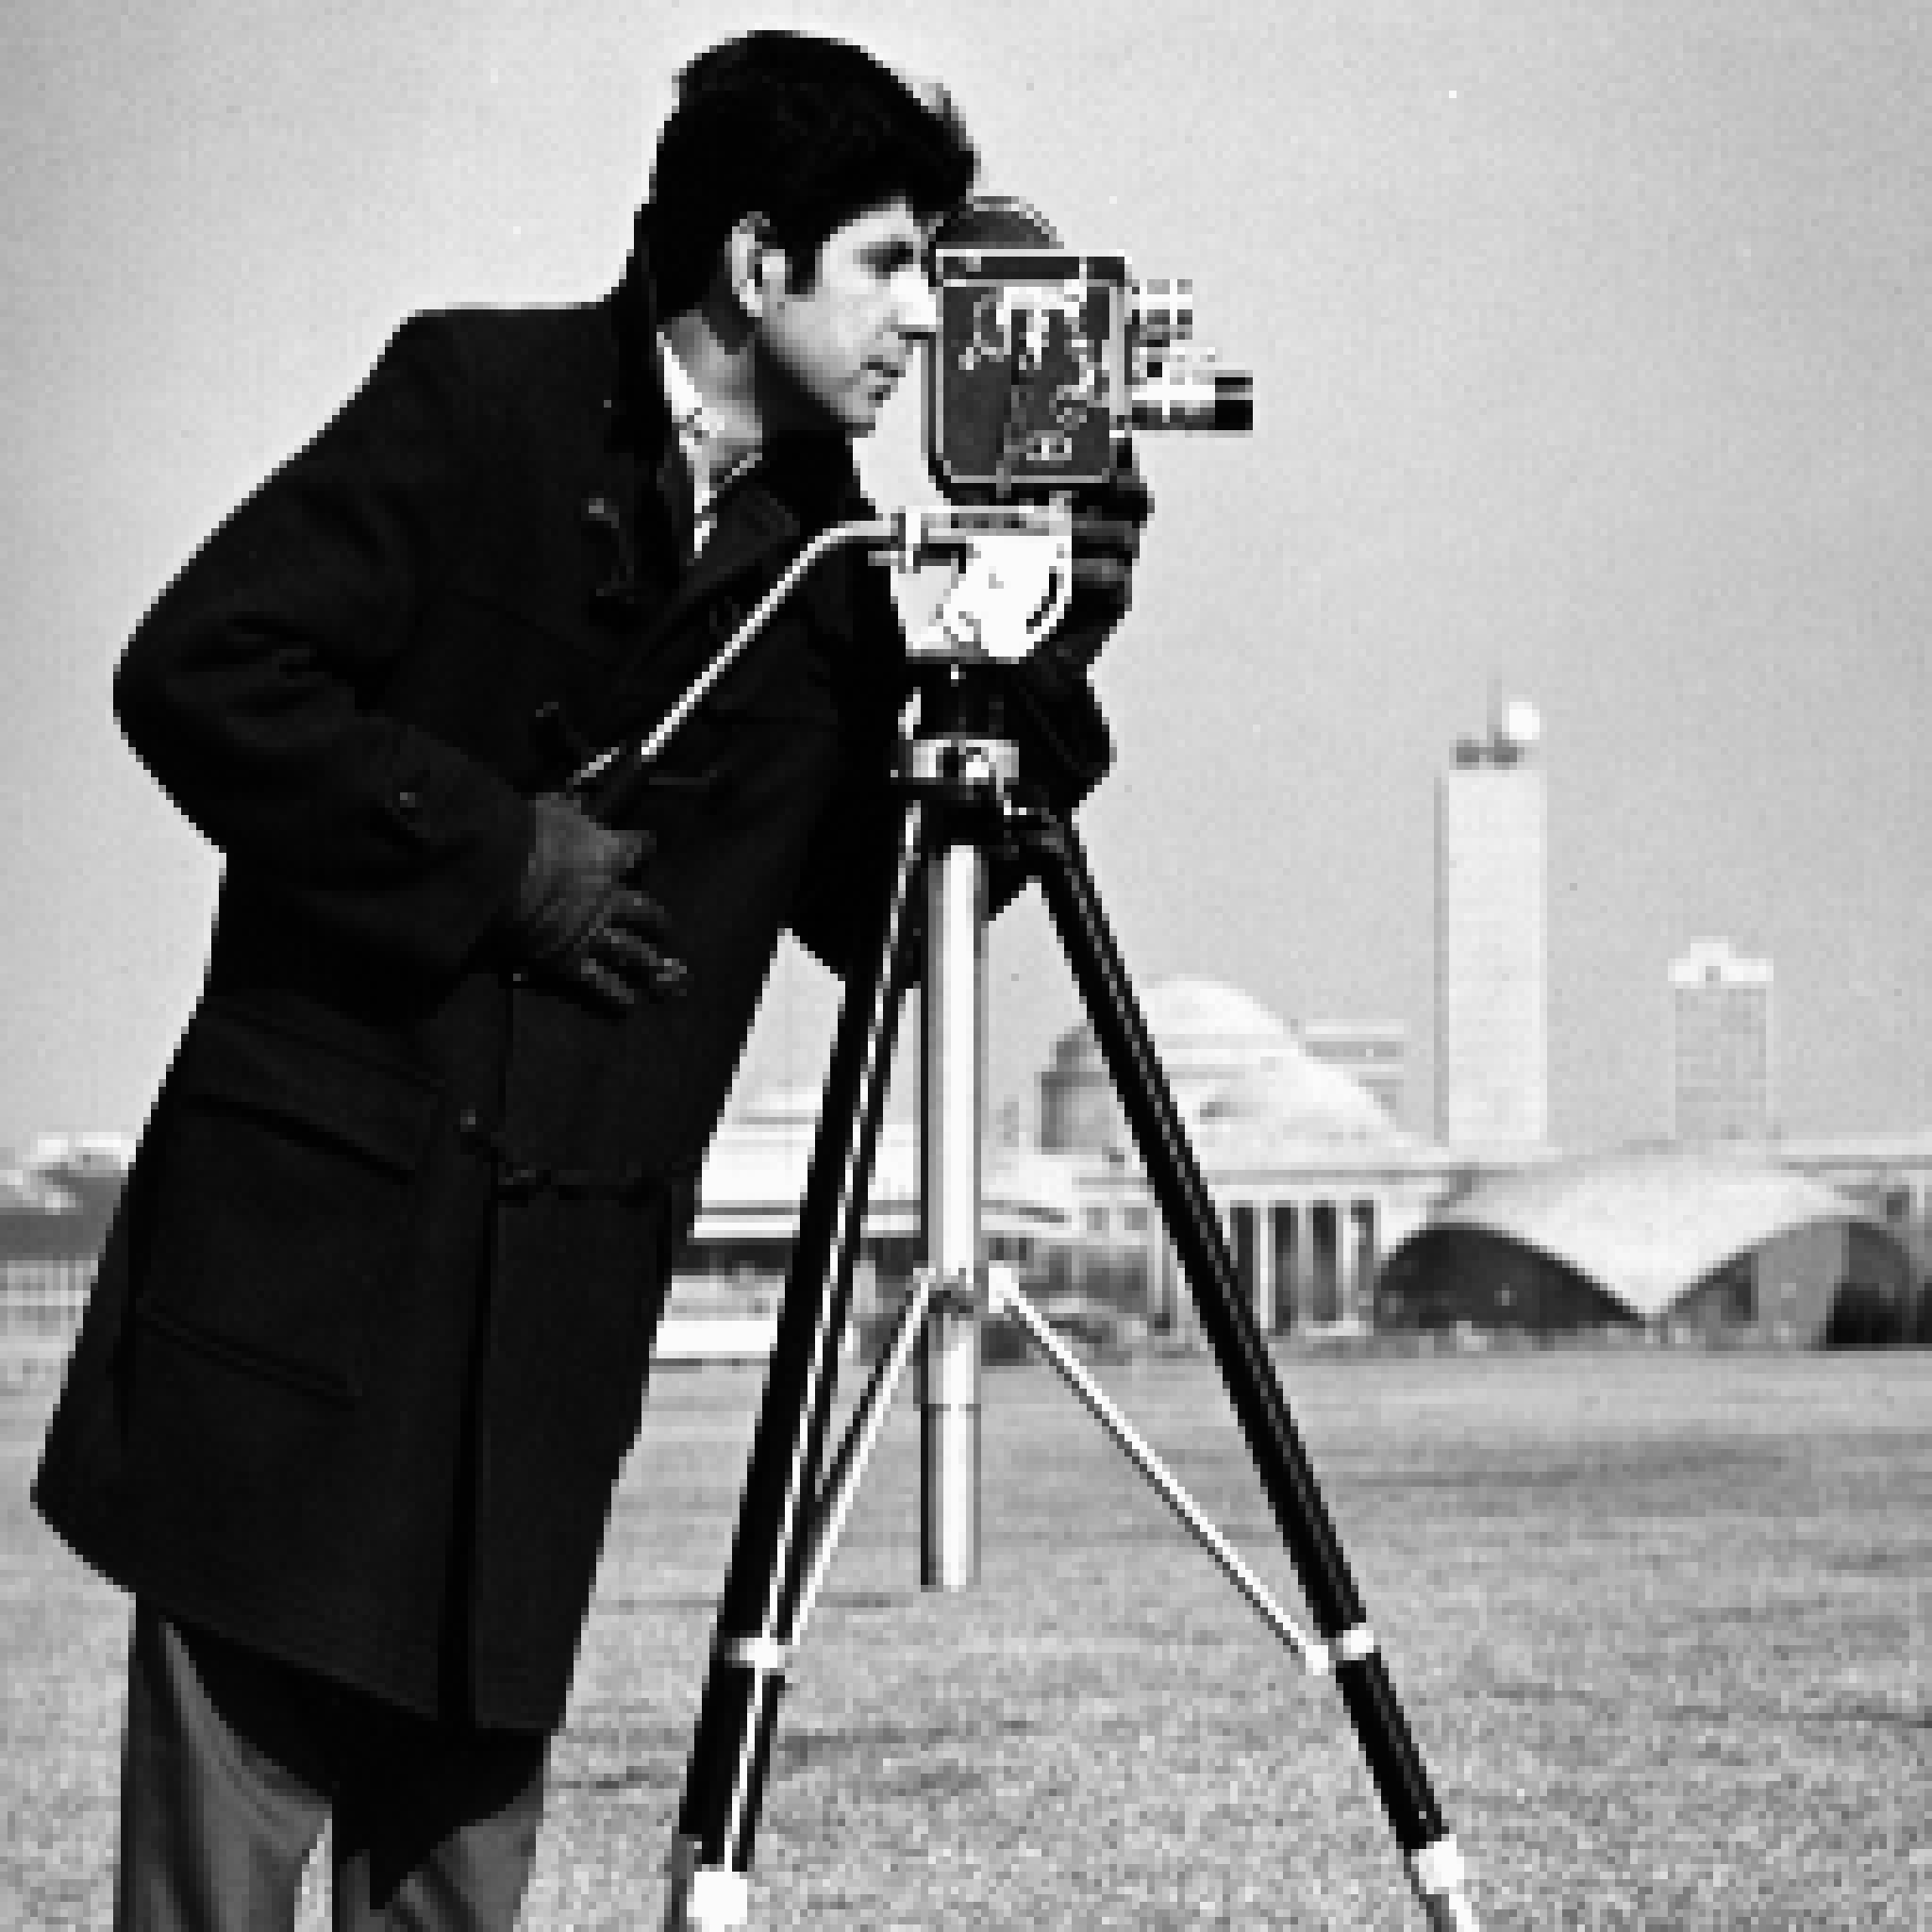

Tamanho da imagem redimensionada:  (2048, 2048) 




In [9]:
show_image(2048,2048,'../data/cameraman.tif')

É importante observar que ao **aumentar** as dimensões para valores maiores que o tamanho original, notamos distorções. Também é possível deformar uma imagem ao fazer o redimensionamento com valores que não são proporcionais às dimensões originais, como pode ser visto no exemplo a seguir:

Tamanho original da imagem:  (256, 256)
Imagem:  ../data/cameraman.tif 

Resolução escolhida:  512 x 128


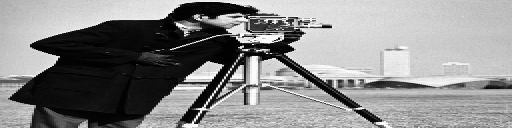

Tamanho da imagem redimensionada:  (512, 128) 




In [10]:
show_image(512,128,'../data/cameraman.tif') 

## Parte 2: Entendendo a resolução radiométrica

Aqui, obtemos os níveis de cinza de uma imagem e usamos a **matplotlib** para fazer a plotagem de um objeto Image da **PIL**

Matriz com niveis de cinza: 

[[169 168 174 ... 194 191 193]
 [174 175 176 ... 188 186 186]
 [171 178 172 ... 195 188 191]
 ...
 [178 183 183 ... 144 186 174]
 [187 180 157 ... 148 183 152]
 [169 170 160 ... 160 198 165]]

Shape de camera_array:  (256, 256)
Tipo de camera_array: <class 'numpy.ndarray'>

Tipo do pixel do array:  uint8


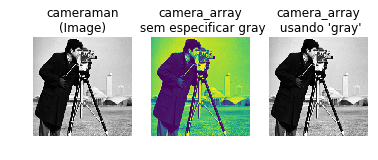

In [109]:
%matplotlib inline

#abertura da imagem com Image.open
cameraman = Image.open('../data/cameraman.tif')


#obtenção de um numpy array a partir do objeto Image
camera_array = np.array(cameraman)
print("Matriz com niveis de cinza: \n")
print(camera_array)
print("\nShape de camera_array: ",camera_array.shape)
print("Tipo de camera_array:",type(camera_array))

print("\nTipo do pixel do array: ",camera_array.dtype)


#usamos subplots para colocar as imagens lado a lado

plt.subplot(1,3,1)

plt.title("cameraman\n(Image)")
plt.axis('off')
plt.imshow(cameraman)



plt.subplot(1,3,2)

plt.title("camera_array\n sem especificar gray")
plt.axis('off')
plt.imshow(camera_array)


plt.subplot(1,3,3)

plt.title("camera_array\n usando 'gray'")
plt.axis('off')
plt.imshow(camera_array,'gray')



In [12]:
a = 3
print(type(a))
a.bit_length()


<class 'int'>


2

Observando as imagens acima, notamos que é possível fazer a exibição da imagem tanto a partir de um objeto Image quanto de um numpy array. Contudo, ao usar **imshow()**, devemos especificar o argumento de **cmap**.

Também é importante observar o tipo do pixel da imagem **(uint8 - unsigned integer, 8 bits)**. Isso significa que temos um _range_ de 2⁸ = 256 valores distintos que cada pixel pode assumir (0 a 255). No caso da escala de cinza, 0 corresponde ao preto e 255 ao branco.

Vamos estudar o efeito da quantização das imagens. Para isso, é necessário alterar o número valores possíveis que cada elemento da matriz pode assumir. Vamos então criar a função **show_qimage()**, que receberá um caminho para uma imagem e uma quantidade de bits para cada pixel, e irá fazer essa alteração, exibindo a imagem original e a imagem resultante, para comparação.

In [78]:
def show_qimage(datapath, bits_per_pixel):

    #abrindo a imagem original 
    original_image = Image.open(datapath)
    
    #display(original_image)
 
    #criando um numpy array a partir da imagem original
    image_array = np.array(original_image)
    print("array obtido a partir da imagem original: \n")
    print(image_array)
    
    plt.subplot(1,2,1)
    plt.title("imagem original")
    plt.axis('off')
    plt.imshow(image_array, 'gray')
    

    #usaremos np.iinfo().max para obter o valor máximo que pode ser representado para o tipo de dado contido na imagem.
    #em seguida, usamos o log na base 2 e convertemos  para obter o numero de bits dos pixels
    bit_number = int(np.log2(np.iinfo(image_array.dtype).max + 1))
  
    
    
    #obtemos aqui a nova imagem através de uma cópia da antiga, dividindo sucessivamente a imagem por 2
    #o numero de divisões depende da diferença entre número de bits por pixel da original e da nova 
    new_image_array = image_array.copy() // ( 2**(bit_number - bits_per_pixel))
    print("array da imagem com nova resolução: \n")
    print(new_image_array)

    #print(image_array.max())
    #print(new_image_array.max())
    
    plt.subplot(1,2,2)
    plt.title("nova_imagem")
    plt.axis('off')
    plt.imshow(new_image_array, 'gray')


Em seguida, fazemos a chamada da função mais algumas vezes, variando o numero de bits na quantização:

[[169 168 174 ... 194 191 193]
 [174 175 176 ... 188 186 186]
 [171 178 172 ... 195 188 191]
 ...
 [178 183 183 ... 144 186 174]
 [187 180 157 ... 148 183 152]
 [169 170 160 ... 160 198 165]]
Numero de bits por pixel da imagem original:  8
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]

Numero de bits por pixel da nova imagem: 
251
1


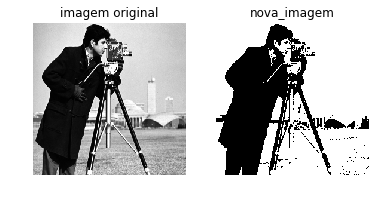

In [58]:
show_qimage('../data/cameraman.tif', 1)

Para facilitar a plotagem de diversas imagens ao mesmo tempo, vamos modificar a função **show_qimage**, criando uma nova função, **show_qimages**. Esta função não fará a exibição da imagem original, apenas a das novas imagens.

In [89]:
def show_qimages(datapath, bits_per_pixel):

    #abrindo a imagem original 
    original_image = Image.open(datapath)
    
 
    #criando um numpy array a partir da imagem original
    image_array = np.array(original_image)
    

    #usaremos np.iinfo().max para obter o valor máximo que pode ser representado para o tipo de dado contido na imagem.
    #em seguida, usamos o log na base 2 e convertemos  para obter o numero de bits dos pixels
    bit_number = int(np.log2(np.iinfo(image_array.dtype).max + 1))  

    
    #obtemos aqui a nova imagem através de uma cópia da antiga, dividindo sucessivamente a imagem por 2
    #o numero de divisões depende da diferença entre número de bits por pixel da original e da nova 
    new_image_array = image_array.copy() // ( 2**(bit_number - bits_per_pixel))

  
    
    plt.figure()
    plt.title('Imagem com  ' + str(bits_per_pixel) + '\nbit(s) / pixel')
    plt.axis('off')
    plt.imshow(new_image_array, 'gray')




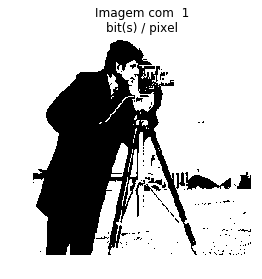

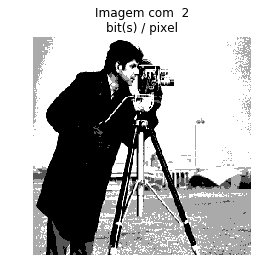

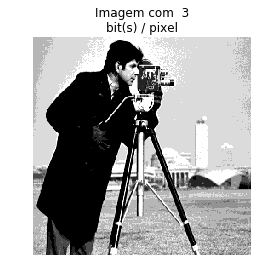

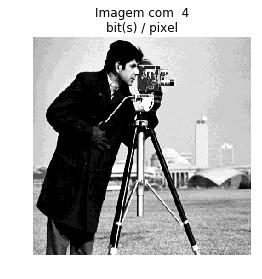

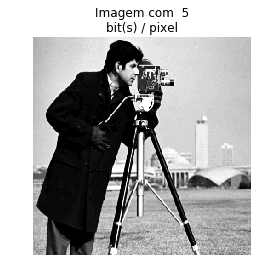

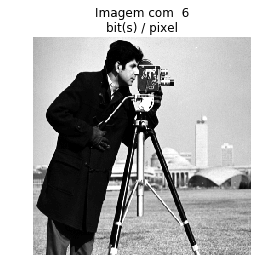

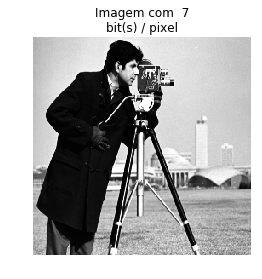

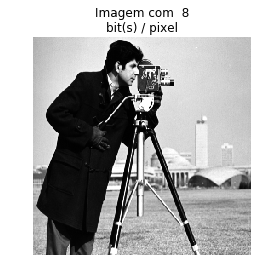

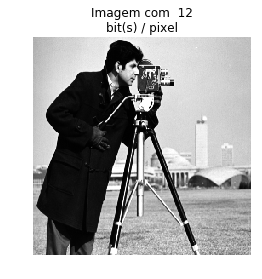

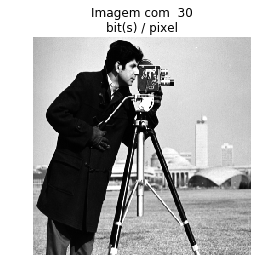

In [91]:
show_qimages('../data/cameraman.tif', 1)
show_qimages('../data/cameraman.tif', 2)
show_qimages('../data/cameraman.tif', 3)
show_qimages('../data/cameraman.tif', 4)
show_qimages('../data/cameraman.tif', 5)
show_qimages('../data/cameraman.tif', 6)
show_qimages('../data/cameraman.tif', 7)
show_qimages('../data/cameraman.tif', 8)
show_qimages('../data/cameraman.tif', 12)
show_qimages('../data/cameraman.tif', 30)

Observando as imagens obtidas anteriormente, nota-se claramente a perda de qualidade para o uso de poucos bits por pixel. Também foi interessante experimentar aumentar o numero de bits por pixel para uma quantidade maior que a imagem original para ver o que acontecia - não foi perceptível uma mudança com a alteração resolução da radiométrica da imagem.

## Parte 3 - Explorando diferentes espaços de cores




O método **split** nos permite obter as bandas RGB de uma imagem:

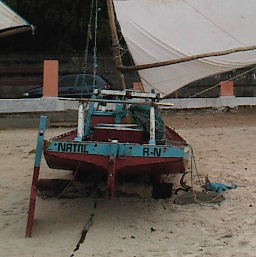

Dimensões de image_array e numero de bandas: 
 (Altura, Largura, Canais):  (257, 256, 3)
componente r: 
 [[ 59  42   0 ... 183 187 184]
 [120  44  41 ... 186 184 183]
 [188 133  60 ... 183 183 182]
 ...
 [151 152 151 ... 192 187 187]
 [147 144 145 ... 187 185 191]
 [149 151 150 ... 175 161 162]] 




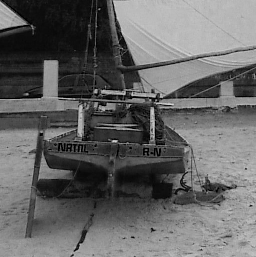

componente g: 
 [[ 93  74  24 ... 181 185 182]
 [146  76  77 ... 186 184 183]
 [198 152  89 ... 183 183 182]
 ...
 [149 151 148 ... 176 169 169]
 [145 142 142 ... 167 165 169]
 [147 149 147 ... 153 137 138]] 




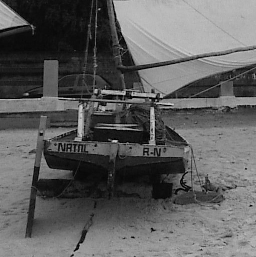

componente b: 
 [[ 92  71  20 ... 182 186 183]
 [145  73  75 ... 186 184 183]
 [199 150  85 ... 183 183 182]
 ...
 [134 133 131 ... 163 157 157]
 [130 127 127 ... 156 154 158]
 [134 136 132 ... 142 127 128]] 




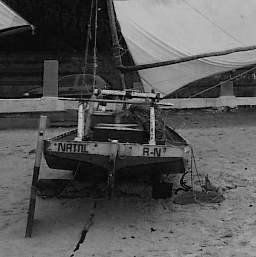

In [125]:
def split_rgb(datapath):
    #usa o metodo split e exibe as 3 componentes

    #abrindo uma imagem colorida
    new_image = Image.open(datapath)
    display(new_image)
    
    image_array = np.array(new_image)
    print("Dimensões de image_array e numero de bandas: \n (Altura, Largura, Canais): ",image_array.shape)
    
    #usando split para obter cada uma das compoentes
    r,g,b = new_image.split()


    #obtenção dos arrays de cada componente
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)

    #exibindo os arrays seguidos das imagens
    print("componente r: \n",r_array,"\n\n")
    display(r)
    print("componente g: \n",g_array,"\n\n")
    display(g)
    print("componente b: \n",b_array,"\n\n")
    display(b)

split_rgb('../data/boat.tif')

Olhando com atenção, observamos que há diferenças em cada uma das imagens das componentes (por exemplo, basta observar a escrita na foto do barco, que é mais acentuada na componente r e mais atenuada nas outras). Embora o desenho seja muito parecido, ao observar os arrays produzidos para cada componente, notamos claramente a diferença do conteúdo de cada um.

Em seguida, analisaremos outros métodos de obtenção da escala de cinza para figuras, implementando funções para a obtenção das figuras em escala de cinzas dada a localização de uma imagem:

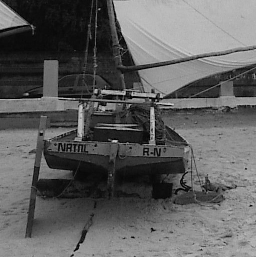

Image array: 
 [[ 82  64  16 ... 181 185 182]
 [138  66  66 ... 186 184 183]
 [195 146  79 ... 183 183 182]
 ...
 [147 149 146 ... 179 173 173]
 [143 140 141 ... 171 169 174]
 [146 148 146 ... 158 143 144]]


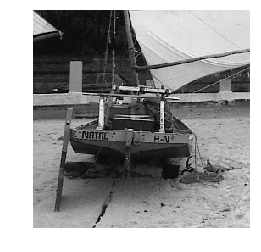

In [171]:
def convert_L(datapath):
    #obtem a imagem em escala de cinza com .convert('L') a partir de um caminho especificado para uma imagem.
    
    
    #abrindo uma imagem colorida
    new_image = Image.open(datapath).convert('L')
    
    #criação de um array a partir da imagem
    image_array = np.array(new_image)
    
    #exibição da imagem com display
    display(new_image)
    
    print("Image array: \n",image_array)
    plt.axis('off')
    plt.imshow(image_array,'gray')
    
convert_L('../data/boat.tif')

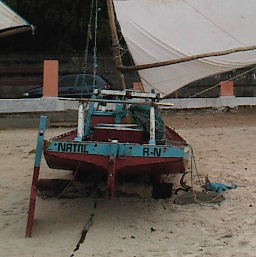

[[81 62 14 ... 11 15 12]
 [51 64 64 ... 15 13 12]
 [24 59 78 ... 12 12 11]
 ...
 [59 60 58 ...  6  0  0]
 [55 52 52 ... 84 82  2]
 [58 60 57 ... 71 56 57]]


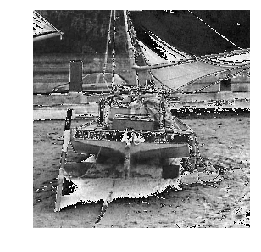

In [276]:
def average_RGB(datapath):
    
    
    #obtem a imagem da escala de cinza a partir da media das componentes RGB
    
    

    #abrindo uma imagem colorida
    new_image = Image.open(datapath)
    display(new_image)
    
    image_array = np.array(new_image)
    
    
    #usando split para obter cada uma das compoentes
    r,g,b = new_image.split()


    #obtenção dos arrays de cada componente
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)

    av_array= (r_array + g_array + b_array)//3
    print(av_array)
    plt.axis('off')
    plt.imshow(av_array,'gray')
    

average_RGB('../data/boat.tif')
    

A seguir, temos a função **luminosity_RGB**, que faz uma média ponderada considerando a sensibilidade humana:

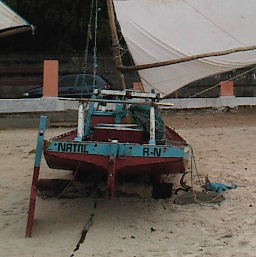

[[18.83 13.79  1.4  ... 51.17 52.29 51.45]
 [35.35 14.35 13.86 ... 52.08 51.52 51.24]
 [53.41 38.43 18.55 ... 51.24 51.24 50.96]
 ...
 [41.09 41.23 40.88 ... 51.73 50.26 50.26]
 [39.97 39.13 39.34 ... 50.19 49.63 51.17]
 [40.67 41.23 40.74 ... 46.69 42.7  42.98]]


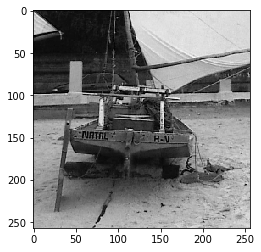

In [269]:
def luminosity_RGB(datapath):
    #Ponderação utilizada: 
    # 0.21 × R + 0.72 × G + 0.07 × B 

 

    #abrindo uma imagem colorida
    new_image = Image.open(datapath)
    display(new_image)
    
    image_array = np.array(new_image)
    
    
    #usando split para obter cada uma das compoentes
    r,g,b = new_image.split()


    #obtenção dos arrays de cada componente
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)

    #obtencao
    av_array= (0.21*r_array + 0*72*g_array + 0.07*b_array)
    print(av_array)
    plt.imshow(av_array,'gray')

luminosity_RGB('../data/boat.tif')   

## Parte 4: Retomando a geração de imagens sintéticas


É possível gerar imagens através de equações matemáticas. Para tanto, faremos uso da função **indices** do numpy, capaz de retornar a localização (linha,coluna) de um determinado elemento de um numpy array.

In [134]:
linha, coluna = np.indices((15,15))

print("Matriz com indices de linhas: \n",linha,"\n")
print("Matriz com indices de colunas: \n",coluna,"\n")

Matriz com indices de linhas: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
 [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
 [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
 [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]] 

Matriz com indices de colunas: 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  1  2  3  4  5 

Podemos pensar nas linhas e colunas como as coordenadas (x,y) utlizadas em equações. Assim, podemos exibir imagens de algumas figuras a partir dessas matrizes, como veremos nas funções definidas a seguir:

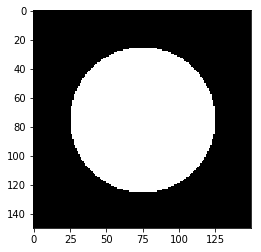

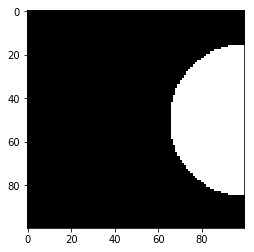

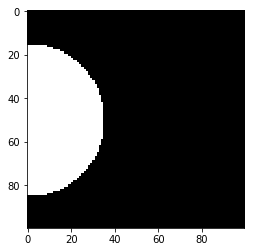

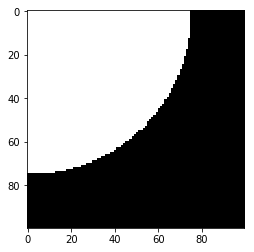

In [193]:
def plot_circle(W,H,radius,x_center,y_center):
    #imprimir uma circunferencia em uma figura com dimensoes WxH
    #raio: radius
    #centrada em (x_center, y_center)
    
    
    L, C = np.indices((W,H))
    func = ((L-y_center)**2 + (C-x_center)**2 < radius**2)


    plt.figure()
    plt.imshow(func,'gray')


plot_circle(150,150,50,75,75)
plot_circle(100,100,35,100,50)
plot_circle(100,100,35,0,50)
plot_circle(100,100,75,0,0)

Usaremos **np.indices** novamente, mas dessa vez para gerar matrizes de indices correspondentes as dimensões 100x100:

In [210]:
L, C = np.indices((100,100))


Em seguida, faremos uma função genérica para plotar uma imagem a partir de uma equaçao definida anteriormente:

In [229]:
def plot_image(f):
    #plota uma imagem de uma determinada equação.
    #A equação deve ser especificada antes de ser colocada como parâmetro de entrada.
    
    #print(f)
    plt.figure()
    plt.imshow(f,'gray')
   

A seguir, temos uma série de equações com parâmetros variados. A intenção foi produzir imagens sem pensar exatamente nas formas e efeitos que seriam reproduzidas, de forma experimental.

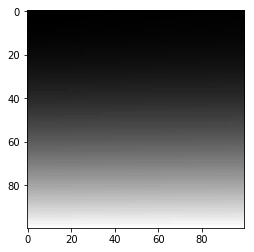

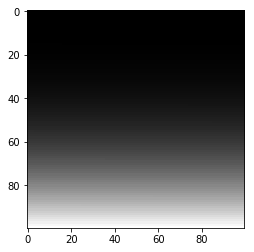

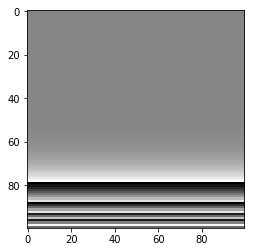

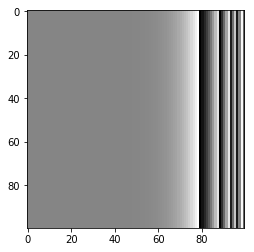

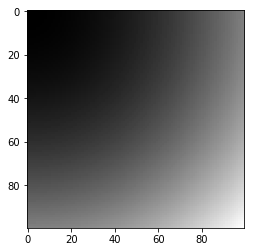

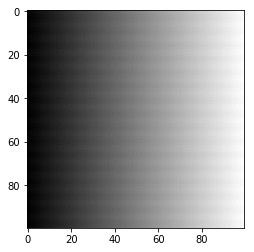

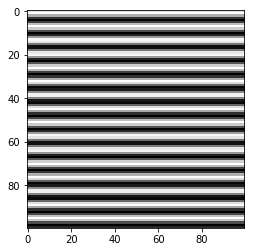

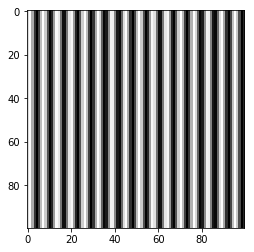

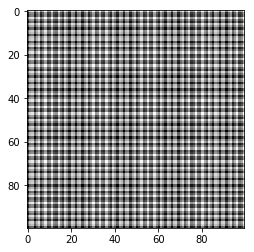

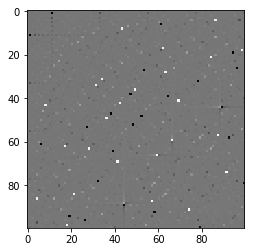

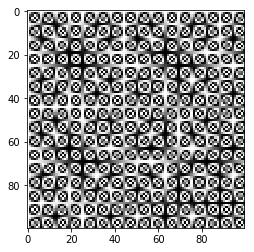

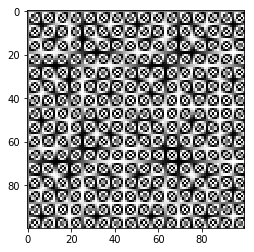

In [245]:
f = L**2 + C
plot_image(f)

f = L**3 -5*C + 1
plot_image(f)

f = L**10 -5*C
plot_image(f)

f = C**10 -5*L
plot_image(f)

f= (L**2 + C**2)
plot_image(f)

f = np.cos(L) + C
plot_image(f)

f = np.cos(L) + np.sin(L)
plot_image(f)

f = np.cos(C) + np.sin(C)
plot_image(f)

f = (np.cos(L))**2 + (np.sin(C)**2)
plot_image(f)

f = np.tan(L*C)
plot_image(f)

f = np.cos(L*C)
plot_image(f)

f = np.sin(L*C)
plot_image(f)

Experimento para teste da geração de imagens de diversas cores e dimensões usando **Image.new**

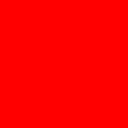

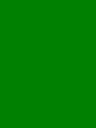

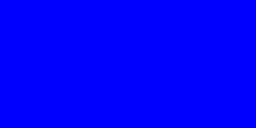

In [246]:
img1 = Image.new("RGB", (128, 128), "red")
img2 = Image.new("RGB", (96, 128), "green")
img3 = Image.new("RGB", (256, 128), "blue")
display(img1)
display(img2)
display(img3)